# Data analysis of MNX dataset

To understand more about the reaction contained.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [8]:
reac = pd.read_csv('mnx_reac_bioreachable.csv')
for col in ['substrates_SMILES', 'products_SMILES']:
    reac[col] = reac[col].apply(eval)
reac

,#ID,equation,substrates_SMILES,products_SMILES
0,MNXR100011,1 MNXM1108175 + 1 MNXM1 + 2 MNXM27 + 1 MNXM403...,"[[H+], OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@H]...","[OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@H]1O, [N..."
1,MNXR100018,1 MNXM1233 + 1 MNXM73 = 1 MNXM23 + 1 MNXM731248,"[OC[C@H](O)[C@@H](O)[C@@H](O)[C@H](O)CO, C=C(O...","[CC(=O)C(=O)[O-], O=P([O-])([O-])OC[C@H](O)[C@..."
2,MNXR100024,1 MNXM1 + 1 MNXM37 + 1 MNXM40333 + 1 MNXM9 = 1...,"[[H+], NC(=O)CC[C@H]([NH3+])C(=O)[O-], Nc1ncnc...",[Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=...
3,MNXR100030,1 MNXM37 + 1 WATER = 1 MNXM729302 + 1 MNXM741173,[NC(=O)CC[C@H]([NH3+])C(=O)[O-]],"[[NH4+], [NH3+][C@@H](CCC(=O)[O-])C(=O)[O-]]"
4,MNXR100036,1 MNXM1104266 + 1 MNXM6274 = 1 MNXM6987 + 1 MN...,[CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)...,[CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C...
...,...,...,...,...
46305,MNXR99957,1 MNXM1627 + 1 WATER = 1 MNXM1734,[O=C([O-])C(=O)C[C@@H](O)[C@H](O)CO],[O=C([O-])[C@H](O)[C@@H](O)[C@@H](O)[C@H](O)CO]
46306,MNXR99976,1 MNXM1100890 + 1 MNXM1105733 = 1 MNXM1102128 ...,[CC(=O)N[C@H]1[C@@H](OP(=O)([O-])OP(=O)([O-])O...,[O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O-...
46307,MNXR99978,1 MNXM1100890 + 1 MNXM8636 = 1 MNXM1102128 + 1...,[CC(=O)N[C@H]1[C@@H](OP(=O)([O-])OP(=O)([O-])O...,[O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O-...
46308,MNXR99980,1 MNXM1100890 + 1 MNXM6274 = 1 MNXM1102128 + 1...,[CC(=O)N[C@H]1[C@@H](OP(=O)([O-])OP(=O)([O-])O...,[O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O-...


## Measure the difference between substrates and products

1. Take the largest molecule from both substrates and products
2. Take the difference in number of molecules between biggest substrates and biggest products

In [9]:
from rdkit.Chem import MolFromSmiles, MolToSmiles

def numAtoms(mol):
    return len(list(mol.GetAtoms()))

In [10]:
diff_list = []
for i in trange(len(reac)):

    substrates_mol = [MolFromSmiles(smi) for smi in reac.loc[i, 'substrates_SMILES']]
    products_mol = [MolFromSmiles(smi) for smi in reac.loc[i, 'products_SMILES']]
    
    substrate_max = max(substrates_mol, key=numAtoms)
    product_max = max(products_mol, key=numAtoms)
    # print(MolToSmiles(substrate_max), MolToSmiles(product_max))

    diff = abs(numAtoms(substrate_max) - numAtoms(product_max))
    # print(diff)

    diff_list.append(diff)

100%|██████████| 46310/46310 [01:37<00:00, 473.61it/s]


(array([4.6014e+04, 2.2800e+02, 2.4000e+01, 8.0000e+00, 1.4000e+01,
        7.0000e+00, 6.0000e+00, 7.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  0. ,  45.9,  91.8, 137.7, 183.6, 229.5, 275.4, 321.3, 367.2,
        413.1, 459. ]),
 <BarContainer object of 10 artists>)

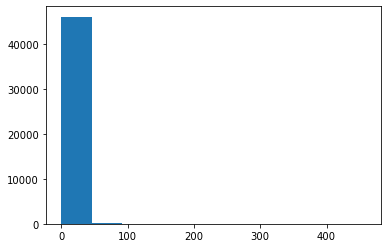

In [19]:
plt.hist(diff_list)

(array([32456.,  5625.,  4113.,  1890.,  1169.,   373.,   177.,   105.,
           92.,    57.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <BarContainer object of 10 artists>)

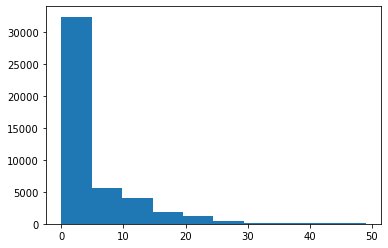

In [22]:
plt.hist([diff for diff in diff_list if diff < 50])

(array([16050.,  7042.,  1935.,  3251.,  4178.,  1174.,  1224.,   795.,
         1105.,  1327.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

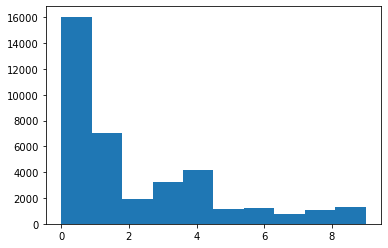

In [23]:
plt.hist([diff for diff in diff_list if diff < 10])